<a href="https://colab.research.google.com/github/babelPish/slaw/blob/master/spacy_basic/colab_notebooks/05_working_with_word_vectors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#5. Woking with word vectors
* 바벨피쉬 : Slaw - Spacy 기초
* 김무성

In [2]:
!python -V

Python 3.6.9


In [3]:
# 버전이 2.2.4 일것. 이 버전에 맞춰서 korean word2vec 실습모델 셋팅함.
import spacy
spacy.__version__ 

'2.2.4'

-------------

# Installation

#### spaCy Lanage Models

In [165]:
# 이미 기본 en 모델은 다운로드 되어 있으나, 혹시 없으면
# !python -m spacy -m en 

#### 시각화 도구
* 구글 Colab에서 한글 문제 대응하기 - https://pinkwink.kr/1255
* https://rasahq.github.io/whatlies/
* https://spacy.io/universe/project/whatlies

In [178]:
# -- 한글폰트 지원을 위한 설치
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 

The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 7 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 144616 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [33]:
import matplotlib as mpl
import matplotlib.pyplot as plt

import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

In [34]:
# 현재 설정되어 있는 폰트 사이즈와 글꼴을 알아보자
!python --version
def current_font():
  print(f"설정 폰트 글꼴: {plt.rcParams['font.family']}, 설정 폰트 사이즈: {plt.rcParams['font.size']}")  # 파이썬 3.6 이상 사용가능하다
        
current_font()

Python 3.6.9
설정 폰트 글꼴: ['NanumBarunGothic'], 설정 폰트 사이즈: 10.0


In [ ]:
# -- whatlies
!pip install whatlies

#### 한국어 지원

In [ ]:
#spacy는 현재 colab에서는 기본 설치되어 있다. 한국어 지원만 다음 과정을 따르면 된다.

In [7]:
# 한국어 형태소 분석을 위한 mecab-ko 설치가 필요하다.
#remove " > /dev/null 2>&1" to see what is going on under the hood
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git > /dev/null 2>&1

In [9]:
cd Mecab-ko-for-Google-Colab

/content/Mecab-ko-for-Google-Colab


In [11]:
!bash install_mecab-ko_on_colab190912.sh > /dev/null 2>&1

In [12]:
# natto-py를 설치해야 mecab-ko를 spaCy에 연동가능하다.
!pip install natto-py > /dev/null 2>&1

In [13]:
# 한국어 처리 가능여부 테스트. 이 코드가 제대로 실행되면 spaCy 한국어 지원이 제대로 된 것이다.
from spacy.lang.ko import Korean

nlp_ko = Korean()

doc = nlp_ko(u'이것은 문장이다') #Creates a Doc object 

for token in doc:  
    print(token.text, token.pos_, token.tag_) #prints the text and POS

이것 PRON NP
은 ADP JX
문장 NOUN NNG
이 ADP VCP
다 X EC


In [130]:
cd /content

/content


---------

-------------

# Pretrained 한국어 Word2Vec을 spaCy에서 사용하기.

#### 참고 
* spaCy official doc. Word Vectors and Semantic Similarity - https://spacy.io/usage/vectors-similarity
* gensim official doc. models.keyedvectors – Store and query word vectors - https://radimrehurek.com/gensim/models/keyedvectors.html
* GENSIM WORD2VEC SIMPLE USAGE - https://gorakgarak.tistory.com/1330
* 딥 러닝을 이용한 자연어 처리 입문 - 영어/한국어 Word2Vec 실습 WikiDocs
3) 영어/한국어 Word2Vec 실습 - https://wikidocs.net/50739
* Pre-trained word vectors of 30+ languages - https://github.com/Kyubyong/wordvectors

#### spaCy 모델로 만들기

In [26]:
!git clone https://github.com/babelPish/slaw.git

Cloning into 'slaw'...
remote: Enumerating objects: 78, done.
remote: Total 78 (delta 0), reused 0 (delta 0), pack-reused 78
Unpacking objects: 100% (78/78), done.


In [4]:
ls

mecab-0.996-ko-0.9.2/         mecab-ko-dic-2.1.1-20180720.tar.gz  slaw/
mecab-0.996-ko-0.9.2.tar.gz   Mecab-ko-for-Google-Colab/
mecab-ko-dic-2.1.1-20180720/  sample_data/


In [28]:
cd slaw/spacy_basic/colab_notebooks/

/content/slaw/spacy_basic/colab_notebooks


In [29]:
ls

05_working_with_word_vectors.ipynb  models/


In [30]:
cd models

/content/slaw/spacy_basic/colab_notebooks/models


In [31]:
ls

ko_wv/


In [33]:
cd ko_wv

/content/slaw/spacy_basic/colab_notebooks/models/ko_wv


In [34]:
ls

ko.zip


In [35]:
!unzip ko.zip

Archive:  ko.zip
  inflating: ko.bin                  
  inflating: ko.tsv                  


In [36]:
import gensim

In [37]:
model = gensim.models.Word2Vec.load('ko.bin')

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [39]:
kv = model.wv

In [40]:
kv.save_word2vec_format('ko_wv.embd', binary=False)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [41]:
ls

ko.bin  ko.tsv  ko_wv.embd  ko.zip


In [42]:
!python -m spacy init-model ko ko_wv.spacy.embd --vectors-loc ko_wv.embd

✔ Successfully created model
30185it [00:01, 17350.54it/s]
✔ Loaded vectors from ko_wv.embd
✔ Sucessfully compiled vocab
30185 entries, 30185 vectors


In [52]:
ls

ko.bin  ko.tsv  ko_wv.embd  ko_wv.spacy.embd/  ko.zip


In [56]:
ls ko_wv.spacy.embd

meta.json  vocab/


#### 만들어진 모델 로드해서 사용하기

In [17]:
nlp_ko_wv = spacy.load('ko_wv.spacy.embd')

In [60]:
doc1 = nlp_ko_wv('안녕하세요') 

In [63]:
doc2 = nlp_ko_wv('안녕')

In [73]:
doc3 = nlp_ko_wv('반가워')

In [65]:
doc4 = nlp_ko_wv('강아지')

In [66]:
doc1.similarity(doc1)

1.0

In [68]:
doc1.similarity(doc2)

0.3767422436269971

In [74]:
doc1.similarity(doc3)

/usr/lib/python3.6/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)


0.0

In [77]:
[(w.text, w.pos_) for w in doc3]

[('반가워', 'ADJ')]

In [78]:
doc1.similarity(doc4)

-0.038436487747098264

#### 시각화

#### 참고
* https://www.kaggle.com/zackakil/
* https://towardsdatascience.com/an-introduction-to-t-sne-with-python-example-5a3a293108d1

In [19]:
cd /content

/content


In [ ]:
# 임베딩 벡터 시각화

In [20]:
# import the PCA module from sklearn
from sklearn.decomposition import PCA

In [21]:
import matplotlib.pyplot as plt

In [22]:
def get_word_vectors(words, nlp):
    # converts a list of words into their word vectors
    return [nlp(word).vector for word in words]

In [23]:
# -- pca로 2차원으로 만들어서 비교

In [42]:
words = ['개', '고양이', '고냥이', '호랑이', '물고기', '강아지', '소년', '소녀', '남자', '여자', '왕', '여왕']

In [25]:
pca = PCA(n_components=2)

pca.fit(get_word_vectors(words, nlp_ko_wv))

word_vecs_2d = pca.transform(get_word_vectors(words, nlp_ko_wv))

In [26]:
# let's look at our new 2D word vectors
word_vecs_2d

array([[-11.08788645,  12.88675012],
       [ -3.00570629,  -0.22195565],
       [ -1.3937363 ,   1.63517171],
       [ -2.29903241,   0.5391626 ],
       [ -2.92855103,   1.75707003],
       [ -1.07697715,   0.43365335],
       [ -0.11787481,  -6.23988172],
       [ -1.05752973,  -9.65796592],
       [ -1.10162882,  -5.87602272],
       [ -1.10889121,  -4.72265974],
       [ 15.24227984,   6.52663981],
       [  9.93553436,   2.94003814]])

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


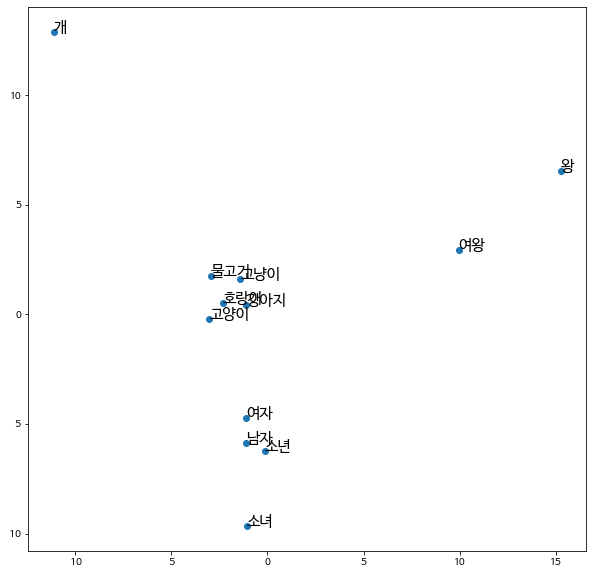

In [36]:
# create a nice big plot 
plt.figure(figsize=(10,10))

# plot the scatter plot of where the words will be
plt.scatter(word_vecs_2d[:,0], word_vecs_2d[:,1])

# for each word and coordinate pair: draw the text on the plot
for word, coord in zip(words, word_vecs_2d):
    x, y = coord
    plt.text(x, y, word, size= 15)

# show the plot
plt.show()

In [37]:
from sklearn.manifold import TSNE

In [43]:
tsne = TSNE(n_components=2)

word_vecs_2d_tsne = tsne.fit_transform(get_word_vectors(words, nlp_ko_wv))

In [44]:
word_vecs_2d_tsne

array([[-230.2562   ,  -94.20286  ],
       [ 147.29333  ,  356.22983  ],
       [ -88.50408  ,   81.224724 ],
       [ 165.77902  ,   -5.5234838],
       [ -69.99862  , -280.52545  ],
       [  82.034386 ,  165.05797  ],
       [-279.67334  ,  146.50891  ],
       [ -93.41768  ,  306.74582  ],
       [ 356.97256  ,  -70.739525 ],
       [ 307.52155  ,  169.92996  ],
       [  -4.7599955,  -89.358894 ],
       [ 170.73041  , -231.02373  ]], dtype=float32)

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


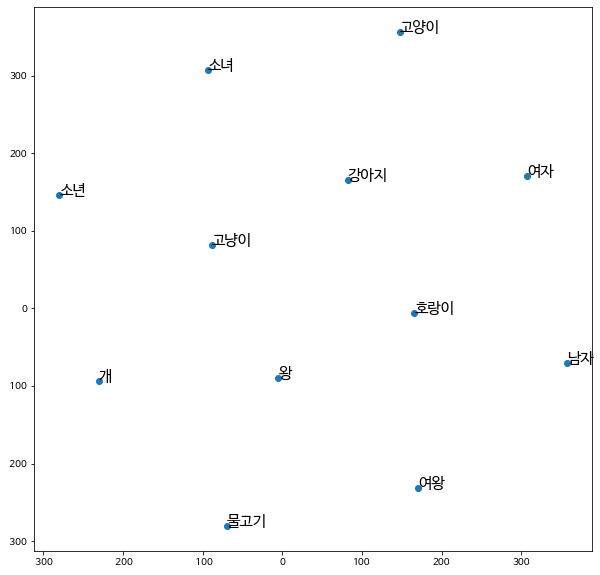

In [45]:
# create a nice big plot 
plt.figure(figsize=(10,10))

# plot the scatter plot of where the words will be
plt.scatter(word_vecs_2d_tsne[:,0], word_vecs_2d_tsne[:,1])

# for each word and coordinate pair: draw the text on the plot
for word, coord in zip(words, word_vecs_2d_tsne):
    x, y = coord
    plt.text(x, y, word, size= 15)

# show the plot
plt.show()

#### 참고
* https://rasahq.github.io/whatlies/
* https://spacy.io/universe/project/whatlies

In [ ]:
# whatlies 사용해보기

In [132]:
from whatlies import EmbeddingSet
from whatlies.language import SpacyLanguage

In [141]:
ls

ko.bin  ko.tsv  ko_wv.embd  ko_wv.spacy.embd/  ko.zip


In [142]:
lang = SpacyLanguage('./ko_wv.spacy.embd')

In [163]:
words = ['개', '고양이', '고냥이', '호랑이', '물고기', '강아지', '소년', '소녀', '남자', '여자', '왕', '여왕']

In [164]:
emb = lang[words]
emb.plot_interactive(x_axis='남자', y_axis='여자')

alt.LayerChart(...)